<h1>Lab 7 - PCA</h1>

Image Reconstruction using PCA: In the provided MNIST dataset of handwritten digits, use PCA to perform dimensionality reduction and select top principal components that explain at least (90 + your_roll_number / 12)% variance of data. Then using these selected principal components reconstruct the approximate images data at the data indices your_roll_number, 2 * your_roll_number, 4 * your_roll_number and 8 * your_roll_number.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
data = pd.read_csv('mnist_train_small.csv', header=None)
data_array = data.to_numpy()

In [12]:
labels = data_array[:,0]
images = data_array[:,1:]
labels

array([6, 5, 7, ..., 2, 9, 5], shape=(20000,))

In [13]:
images_mean = np.mean(images, axis=0)
images_centerd = images - images_mean
images_centerd.shape

(20000, 784)

In [17]:
cov_matrix = np.cov(images_centerd, rowvar=False)
print(cov_matrix.shape)

(784, 784)


In [19]:
eigenValues, eigenVectors = np.linalg.eig(cov_matrix)
print("eigenValues = ",eigenValues.shape)
print("eigenVectors : \n",eigenVectors.shape)

eigenValues =  (784,)
eigenVectors : 
 (784, 784)


In [20]:
sorted_indices = np.argsort(eigenValues)[::-1]
sorted_eigenValues = eigenValues[sorted_indices]
sorted_eigenVectors = eigenVectors[:,sorted_indices]

In [22]:
total_variance = np.sum(eigenValues)
variance_ratio = sorted_eigenValues/total_variance

In [37]:
def plot_bar(data, xlabel = '', ylabel = '', title = ''):
    plt.bar(range(1, len(data)+1), data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Nayan Khusu 080BCT048 \n{title}')
    plt.show()
def plot_line(data, xlabel = '', ylabel = '', title = ''):
    plt.plot(range(1, len(data)+1), data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Nayan Khusu 080BCT048 \n{title}')
    plt.grid(True)
    plt.show()

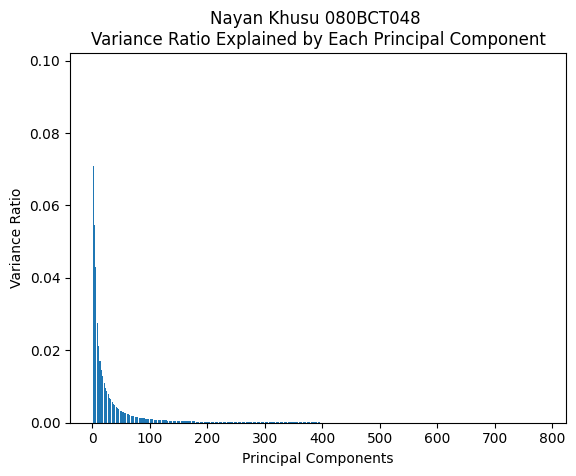

In [33]:
plot_bar(variance_ratio, 'Principal Components', 'Variance Ratio', 'Variance Ratio Explained by Each Principal Component')

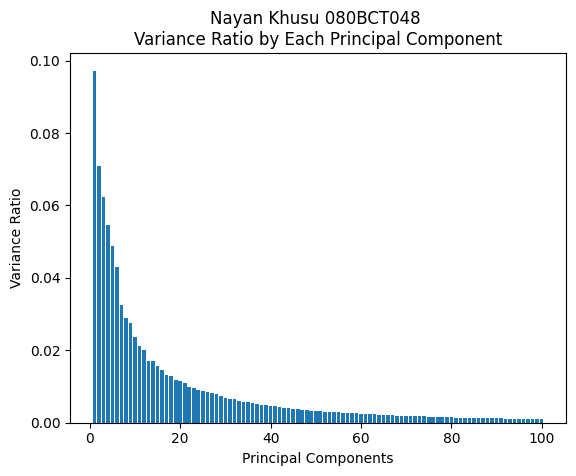

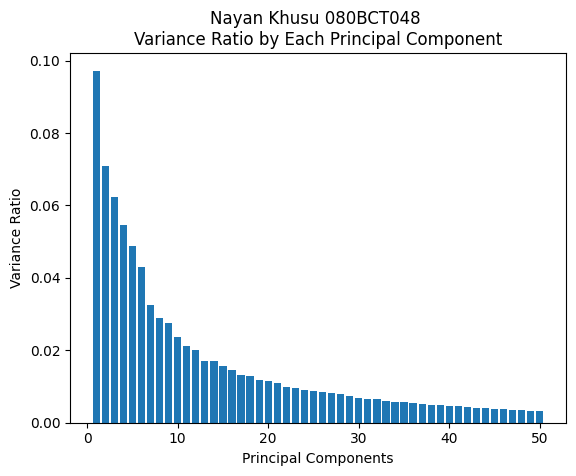

In [39]:
plot_bar(variance_ratio[:100], 'Principal Components', 'Variance Ratio', 'Variance Ratio by Each Principal Component')
plot_bar(variance_ratio[:50], 'Principal Components', 'Variance Ratio', 'Variance Ratio by Each Principal Component')

In [29]:
cumulative_variance_ratio = np.cumsum(variance_ratio)

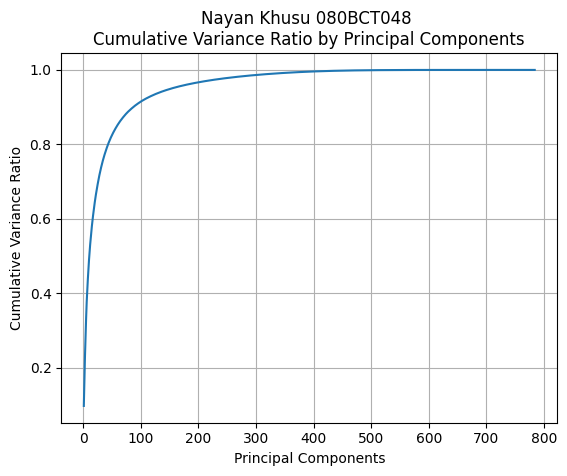

In [41]:
plot_line(cumulative_variance_ratio, 'Principal Components', 'Cumulative Variance Ratio', 'Cumulative Variance Ratio by Principal Components')

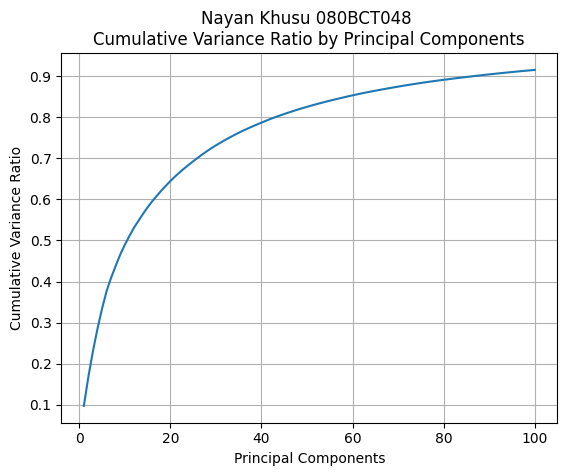

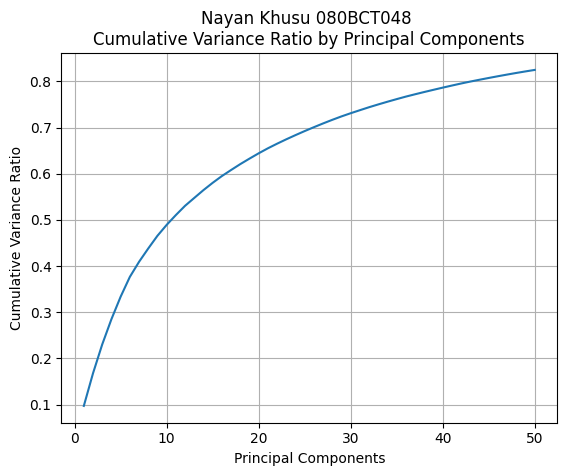

In [43]:
plot_line(cumulative_variance_ratio[:100], 'Principal Components', 'Cumulative Variance Ratio', 'Cumulative Variance Ratio by Principal Components')
plot_line(cumulative_variance_ratio[:50], 'Principal Components', 'Cumulative Variance Ratio', 'Cumulative Variance Ratio by Principal Components')